# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
df = pd.read_csv('EasyVisa.csv')

In [3]:
# Copying the dataset
data = df.copy()

In [4]:
# Displaying the first five rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# Displaying the dataframe dictionnary : null value, datatypes, etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# Displaying the number of rows and columns
data.shape

(25480, 12)

- The dataset has 25480 rows and 12 columns. 
- The dataset has three data types: object, integer and float

In [7]:
# Displaying the number of unique values for case id column
data['case_id'].nunique()

25480

In [8]:
# Checking for duplicated values
data.duplicated().sum()

0

- The case id displays unique rows.
- No duplicates can be spotted.
- "case_id" column can be dropped.

In [9]:
# Describing the dataframe with central tendancy summary
data.describe(include="all")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


- The average salary is 74455 for a maximum of 319210. Half of the positions offer a salary of about 70308 but 75% of the positions offer more. Salary can reach  107 735.
- No_of_employees column contains negative values. Min value displays -26. Negative values will be replaced with 0.

In [10]:
# Checking the number of negative employees in the no of employees column
data[data['no_of_employees'] < 0].value_counts().sum()

33

In [11]:
# Replacing the negative values with 0
data['no_of_employees'] = data['no_of_employees'].apply(lambda x: 0 if x < 0 else x)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

#### Continuous Variables

In [12]:
# function to plot a boxplot and a histogram along the same scale.
def histo_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

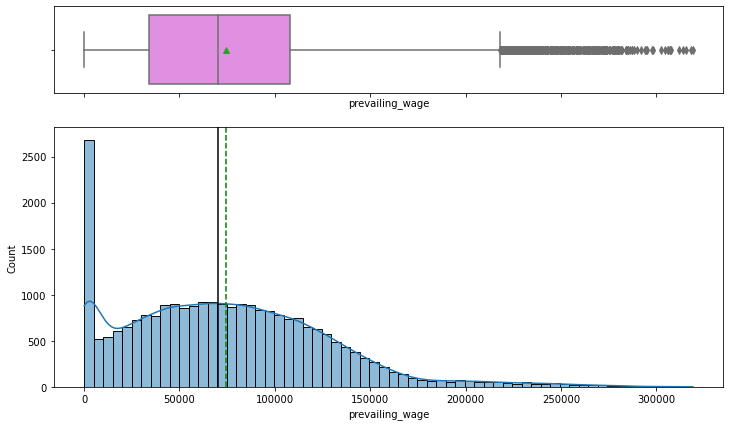

In [13]:
histo_box(data, 'prevailing_wage', kde=True)

- Prevailing wage follows a right skewed distribution with wages reaching 300000 or more, which might indicate the presence of outliers.

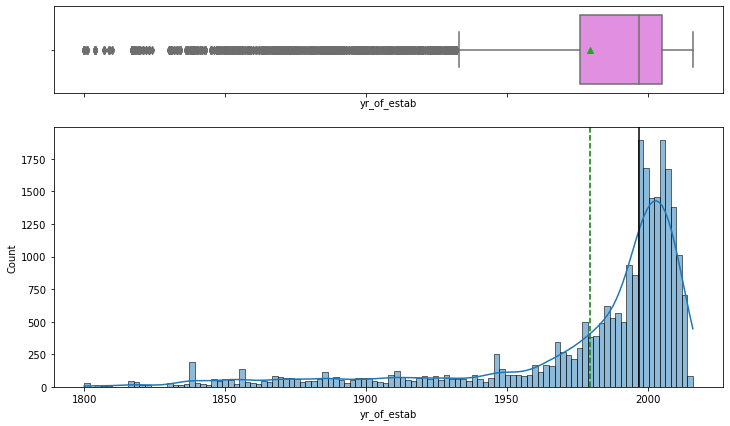

In [14]:
histo_box(data, 'yr_of_estab', kde=True)

- Years of establishment distribution is left skewed  with the bulk of visas peaking up from the 1950s.

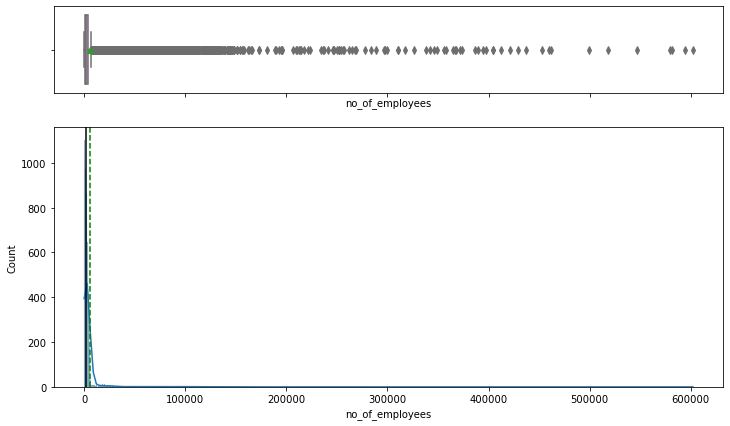

In [15]:
histo_box(data, 'no_of_employees',kde=True)

- The number of employees is heavily right skewed

#### Categorical Variables

In [16]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

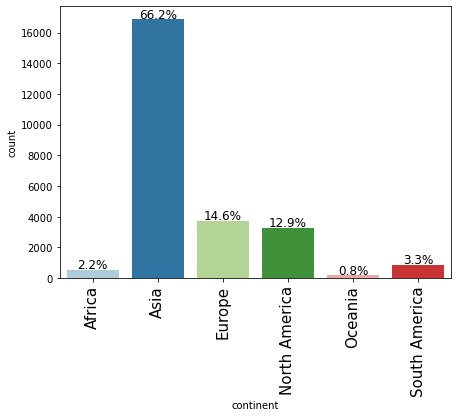

In [17]:
labeled_barplot(data, 'continent', perc=True)

- Asia tops the list of the continents in the number of visa's seekers
- Europe follows as the second most important continent where visa applicants originate from.
- Oceania and Africa are less likely to have visa applicants or to have visa opportunities.

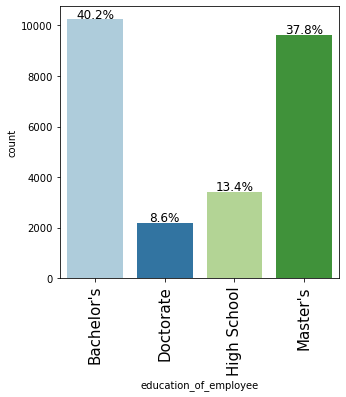

In [18]:
labeled_barplot(data, 'education_of_employee', perc=True)

- Bachelor's degree holders are the highest visa's seekers followed by those who have masters. Doctorate degree holders are the least to seek visas.

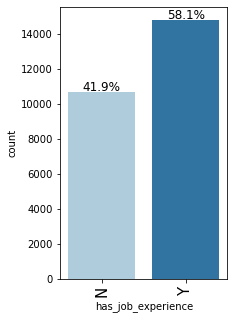

In [19]:
labeled_barplot(data, 'has_job_experience', perc=True)

- Most of the visa seekers have job experience around 60% as opposed to those who do not(41.9%)

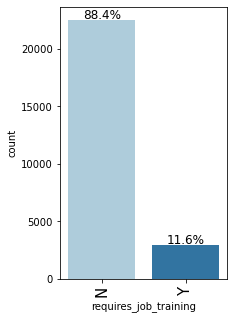

In [20]:
labeled_barplot(data, 'requires_job_training', perc=True)

- Almost 90% of the jobs do not require training. Only 11.6% require it.

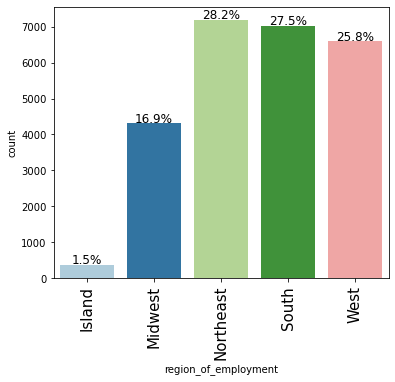

In [21]:
labeled_barplot(data, 'region_of_employment', perc=True)

- The Northeast, the South, and the West offer respectively more opportunities to foreign workers than the MidWest and Island which close the list with lesser opportunities.

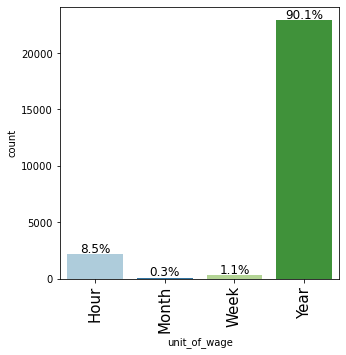

In [150]:
labeled_barplot(data, 'unit_of_wage', perc=True)

- The yearly wage is overwhelmingly the most commonly unit used to attract foreign workers. Hourly wage comes as the last unit of wage. Monthly and weekly rates are very rare with very low percentages.

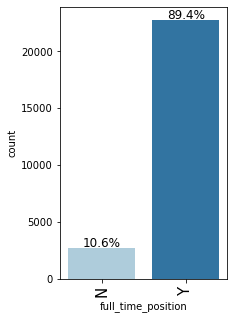

In [23]:
labeled_barplot(data, 'full_time_position', perc=True)

- Full time positions constitute the bulk of jobs opportunities. Only 10.6% of jobs opportunities are part time or others.

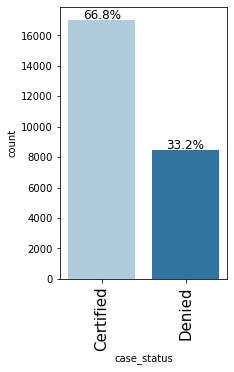

In [24]:
labeled_barplot(data, 'case_status', perc=True)

- 66.8% of visa applicants get certified as opposed to 33.2% who are denied.
- The rate of certification is twice the one of denials.

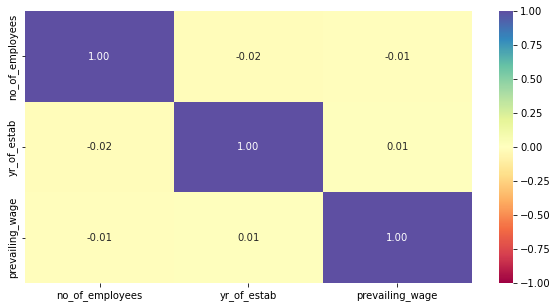

In [25]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- No significant correlation can be noticed between prevailing wage, number of employees or the year companies were established.

### Bivariate Analysis

In [26]:
### Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### No. of Employees and Case Status

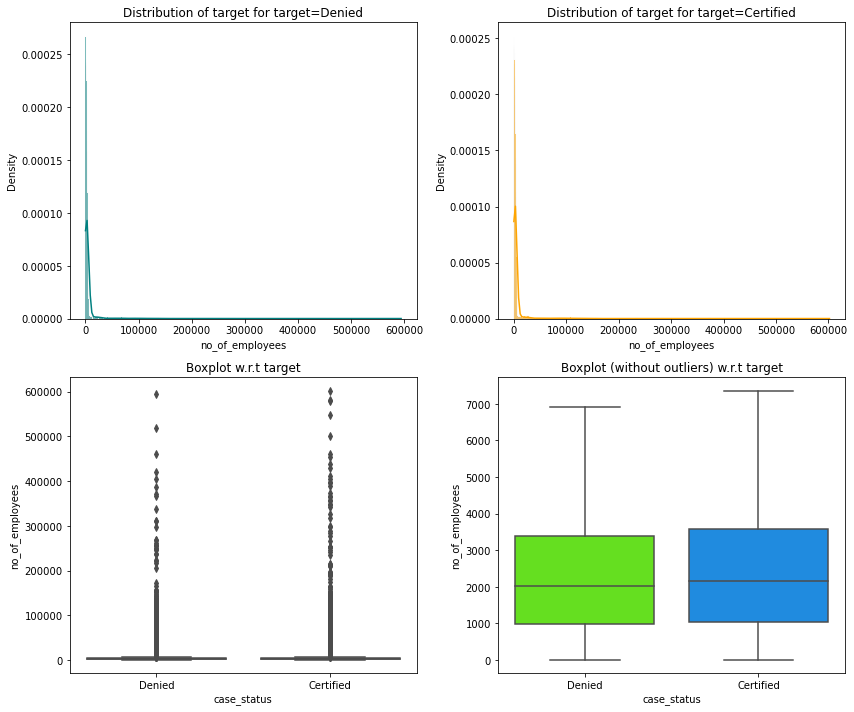

In [27]:
distribution_plot_wrt_target(data,'no_of_employees', 'case_status' )

- Denied and certified visas are independent of the number of employees that a company may have. 

#### Year of Etablishment and Case Status

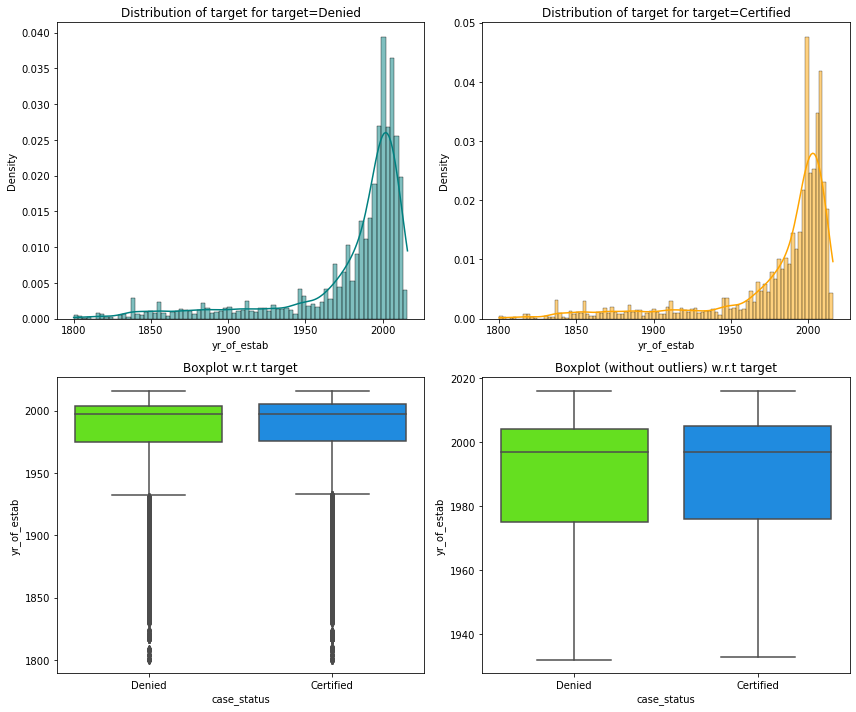

In [28]:
distribution_plot_wrt_target(data,'yr_of_estab', 'case_status' )

- Year of establishment is not correlated to a certified or denied visa. Whether a company was established in the 1800s or in the 2000s does not provide any edge on positive certification outcome.

####  The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

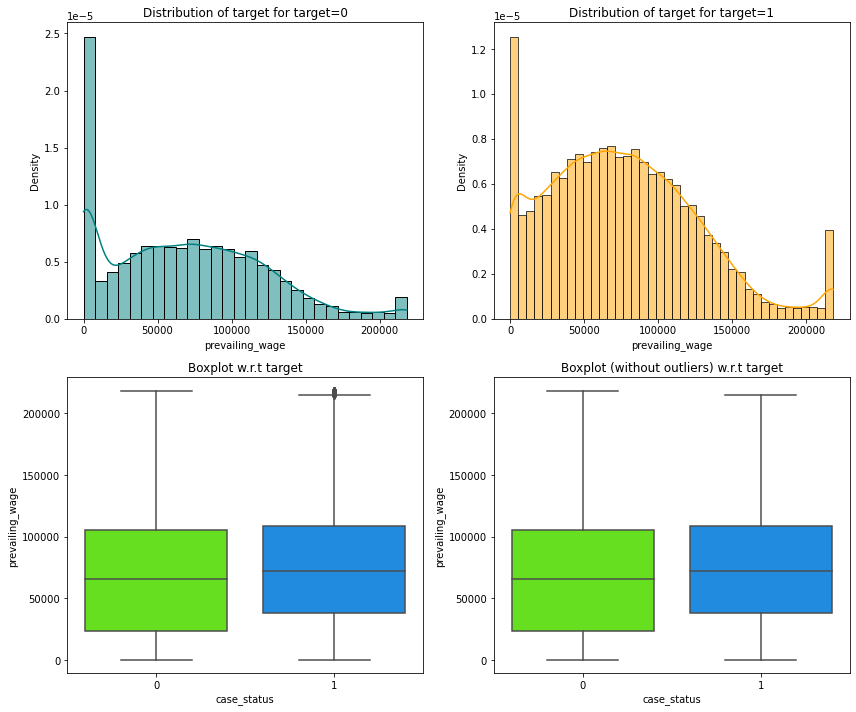

In [147]:
distribution_plot_wrt_target(data,'prevailing_wage', 'case_status' )

- More visas were awarded than denied.
- Denials have been noted with higher salaries. The maximum salary tops more that 230000 as opposed to 210000 for certified visas.

In [30]:

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


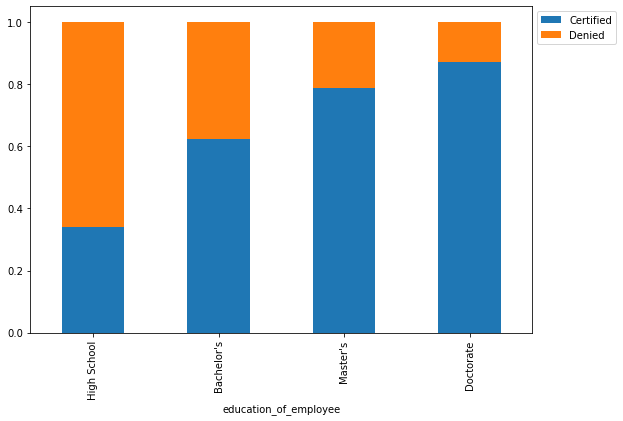

In [31]:
stacked_barplot(data, 'education_of_employee', 'case_status')

- Higher education is positively correlated to visa certification. Doctorate Degree holders have the highest number of visa certifications. Masters's degree holders come in second position.  High schoolers with the lowest level of education show the highest number of denials.


#### How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


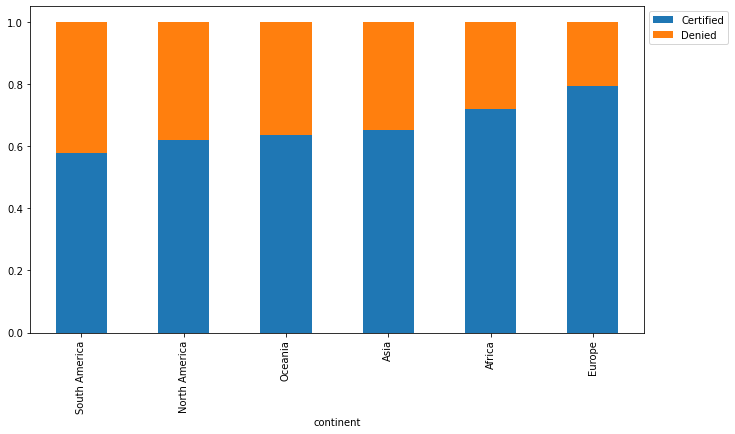

In [32]:
stacked_barplot(data, 'continent', 'case_status')

- Europe and Africa display the highest certification rates as opposed to South America and North America that have the highest denials. 
- The denial rate seems to be slightly the same across all continents. 

####  Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


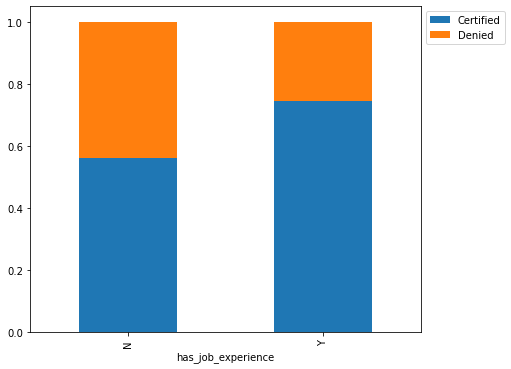

In [33]:
stacked_barplot(data, 'has_job_experience', 'case_status')

- Work experience provides an edge in visa status. 78% of applicants with job experience were granted the visa as opposed to 56% for those who do not have it.

#### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


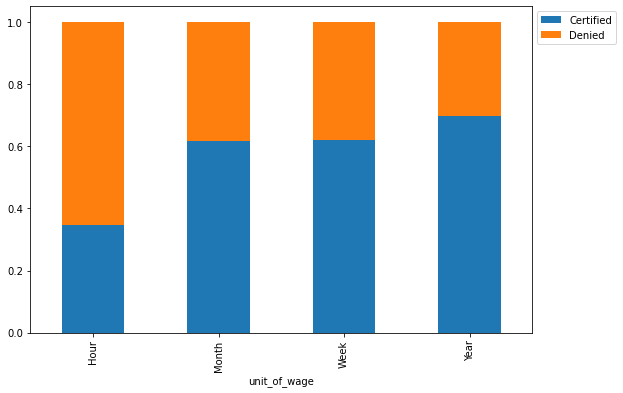

In [34]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

- Visa's denials are the highest for hourly rate applicants
- Yearly rate applicants grant more successfull probabilities for a certified visa than the other type of rates.

#### Region of employment and Visa Certification

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


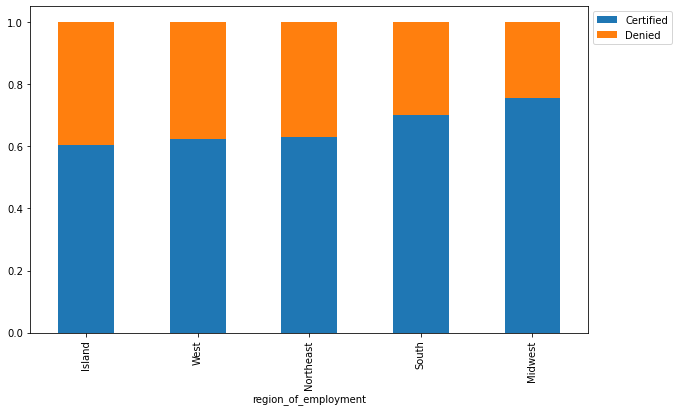

In [35]:
stacked_barplot(data, 'region_of_employment', 'case_status')

- Though the Midwest ranks fourth out of 5 in the number of employment opportunities in the univariate analysis, the bivariate analysis shows that it absorbs the highest number of certified visa applicants.
- The Northeast, which offers more opportunities in previous analysis, ranks third in absorbing the numbers of certified visa applicants.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


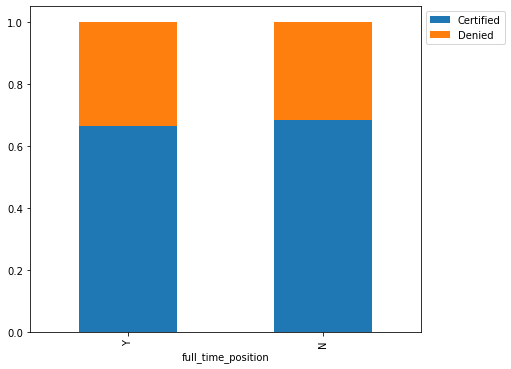

In [36]:
stacked_barplot(data, 'full_time_position', 'case_status')

- Visa certification seems independent of the type of position; whether full time or part time.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


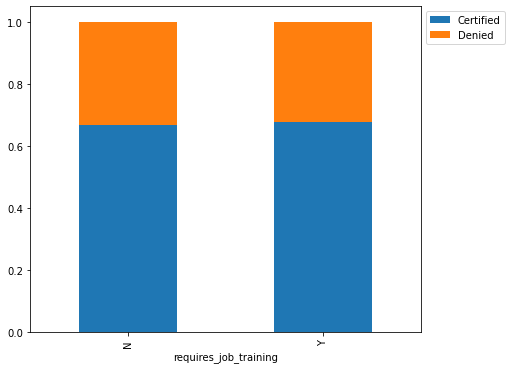

In [37]:
stacked_barplot(data, 'requires_job_training', 'case_status')

- Required job training does not seem to be a decisive factor in awarding a visa.

**Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further**

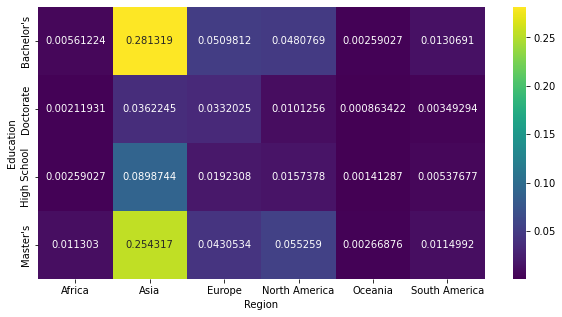

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['continent'],normalize=True),
    annot=True,
    fmt="g",
    cmap="viridis"
) 
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- Asia yields the highest number of bachelors and masters. Oceania provides the least educated workers.

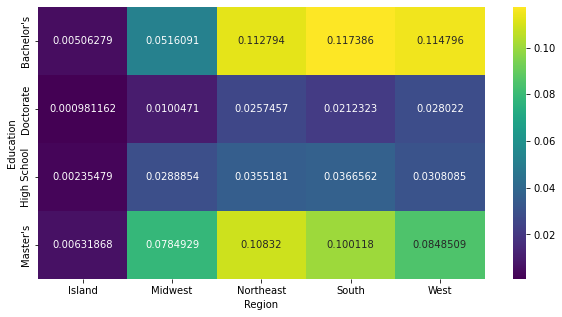

In [39]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment'],normalize=True),
    annot=True,
    fmt="g",
    cmap="viridis"
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- The destinations for most bachelor degree holders who seek a visa are respectively  the South, the West and the Northeast region.
- Doctorate degree holders want to land mainly in the West region and Northeast region.
- High schoolers prefer the south and the Northeast region.
- Master degree holders settle in the Northeast region and the South.

###  EDA Insights

- Higher education appears to be a good predictor in visa certification. The higher the level of education, the higher the probability to be awarded a visa. 
- A company's life span does not seem to have an impact on awarding a visa to applicants for their job opportunities. 
- Visas are mainly awarded to salaries ranging from 50000 to 150000. Higher salaries are rarely awarded.
- The rate of certifided visas is higher for applicants from Europe and Africa than the one from other continents. 
- Work experience provides an edge in visa certification and appears to be a decisive factor.  
- The type of job whether full time or part time, as well as the training requirement, do not seem to have an impact on the visa certification process.
- Yearly rate applicants wind up with more successfull probabilities than the other type of rates.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

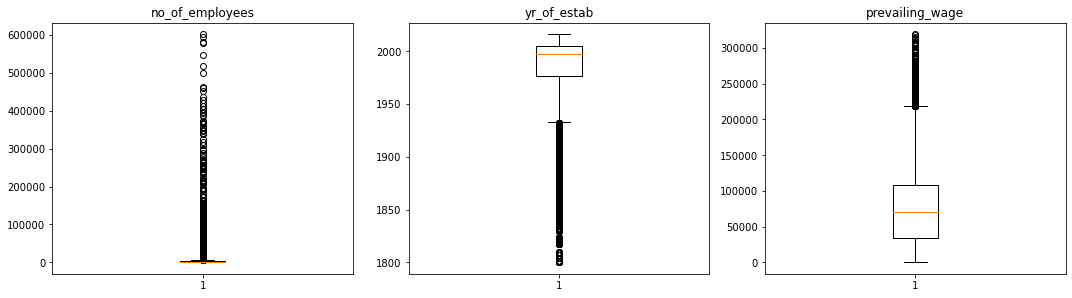

In [40]:
# In the EDA, we have visually spotted outliers. Here we will do it again to ease
# comparison when applying treatment. 

outlier_cols = data.select_dtypes(include=np.number).columns

# Plotting the boxplots
plt.figure(figsize=(15, 35))

# looping through the outliers list and displaying the boxplots showing the outliers
for i, variable in enumerate(outlier_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [41]:
 # functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # All the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker- Flooring
    # All the values greater than Upper_Whisker will be assigned the value of Upper_Whisker- Capping

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [42]:
# Defining the outliers columns list to be treated
treat_out_cols = [
    item
    for item in data.select_dtypes(include=np.number).columns

]

# Applying the treatment function by passing the dataframe and the outliers list
df2 = treat_outliers_all(data, treat_out_cols)

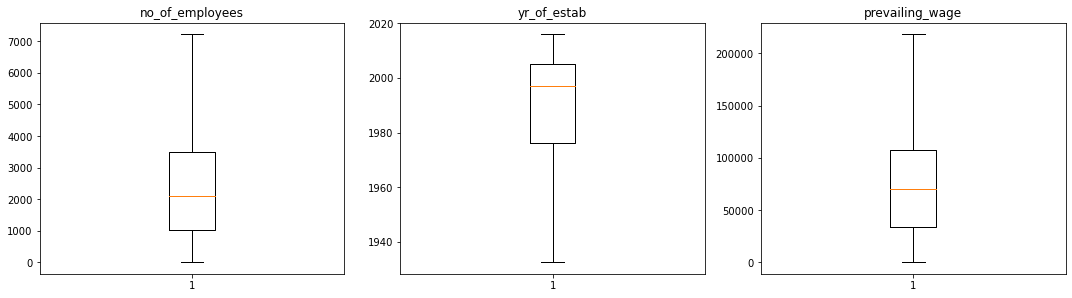

In [43]:
# Plotting the variables after outlier treatement
plt.figure(figsize=(15, 35))

for i, variable in enumerate(outlier_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [44]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [45]:
data.drop(['case_id'], axis=1, inplace=True)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,7227.0,2007.0,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,7227.0,2008.0,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98.0,1932.5,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified


In [46]:
data[data['no_of_employees'] < 0].value_counts().sum()

0

## Data Preparation

In [47]:
# Transforming the case status column in binary data (1 and 0)
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == "Certified" else 0)

In [48]:
# Splitting the data into X and Y variables
X = data.drop(['case_status'], axis=1)
y= data['case_status']

In [49]:
# Encoding the categorical variables
X= pd.get_dummies(X, drop_first= True)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,7227.0,2007.0,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412.0,2002.0,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,7227.0,2008.0,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98.0,1932.5,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082.0,2005.0,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


## Split Data

In [50]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1, stratify=y)

In [51]:
# Showing the number of rows and columns in the train and test data. Could have displayed a tuple using just the 
# shape attribute
print("Number of rows in train data =", X_train.shape[0])
print("Number of columns in train data =", X_train.shape[1])
print("Number of rows in test data =", X_test.shape[0])
print("Number of columns in test data =", X_test.shape[1])

Number of rows in train data = 17836
Number of columns in train data = 21
Number of rows in test data = 7644
Number of columns in test data = 21


In [52]:
# Printing the percentage of class 1 and O in the train and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Building bagging and boosting models

### Model evaluation criterion

### Function Objective:

1. Model predicts that the visa application gets certified but is denied (FP)- False Positive.
2. Model predicts that the visa application will not be certified but in fact winds up certified. (FN)- False Negative. 

### Decision Making: 
 - The company will have to deal with two facts:

* If a visa is certified when it should have been denied, a mismatch can occur and a wrong employee will get the position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a valuable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used as a metric for evaluation of the model. The greater the F1  score, the higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

- To increase efficiency, we will automate the production of metrics by creating two user defined functions:
 -  The model_performance_classification_sklearn function will be used to check the model performance of models. 
 - The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [53]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependant variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    # Computing Accuracy
    acc = accuracy_score(target, pred)
    # Computing recall
    recall = recall_score(target, pred)
    # Computing precision
    precision = precision_score(target, pred)
    # Computing f1 score
    f1 = f1_score(target,pred)
    
    # Creating a dataframe to display metrics
    df_perf= pd.DataFrame ({'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1}, index=[0])
    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm= confusion_matrix(target, y_pred)
    labels = np.asarray([['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item/cm.flatten().sum())]
                        for item in cm.flatten()]).reshape(2,2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Bagging Model Building

### Decision Tree

- We will start off with the first bagging technique

In [55]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [56]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


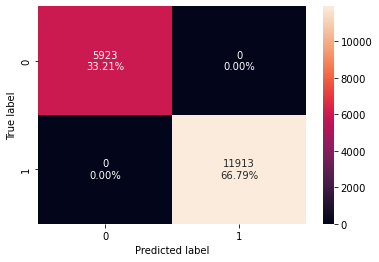

In [57]:
confusion_matrix_sklearn(model, X_train, y_train) 

#### Checking model performance on test set

In [58]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.652276,0.732027,0.743386,0.737663


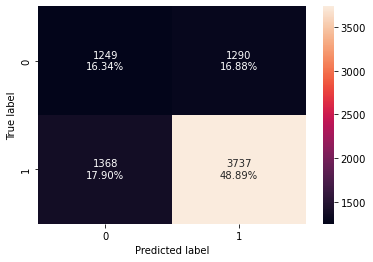

In [59]:
confusion_matrix_sklearn(model, X_test, y_test)

- The model shows great performance on the training dataset but poor performance on the test set.
- Overfitting lies in the training data.
- Let's check Bagging Classifier.

### Bagging Classifier

In [60]:
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

In [61]:
bagging_estimator_perf_train = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
bagging_estimator_perf_train

,Accuracy,Recall,Precision,F1
0,0.984974,0.985394,0.992056,0.988714


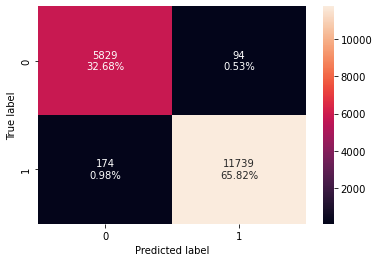

In [62]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train) 

#### Checking model performance on testing set

In [63]:
bagging_estimator_perf_test = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
bagging_estimator_perf_test

,Accuracy,Recall,Precision,F1
0,0.698325,0.773947,0.77425,0.774099


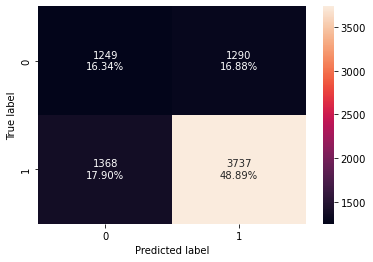

In [64]:
confusion_matrix_sklearn(model, X_test, y_test) 

- Bagging classifier performs well on the train data. 
- A high variance can be noticed for accuracy between the test data and the train data.
- F1 score does a little better but is not good enough. The model does not generalize well. In fact, we notice a data overfitting.
- Improvement is needed.
- Let's try another model.

### Random Forest

In [65]:
rdmf_estimator= RandomForestClassifier(class_weight='balanced', random_state=1)
rdmf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

In [66]:
rdmf_estimator_perf_train = model_performance_classification_sklearn(
    rdmf_estimator, X_train, y_train
)
rdmf_estimator_perf_train

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


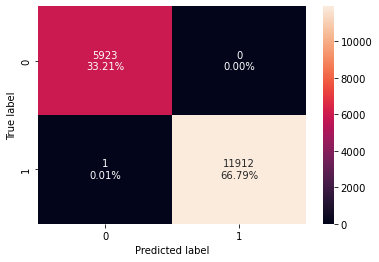

In [148]:
confusion_matrix_sklearn(rdmf_estimator, X_train, y_train) 

#### Checking model performance on testing set

In [68]:
rdmf_estimator_perf_test = model_performance_classification_sklearn(
    rdmf_estimator, X_test, y_test
)
rdmf_estimator_perf_test

,Accuracy,Recall,Precision,F1
0,0.721088,0.841136,0.764737,0.801119


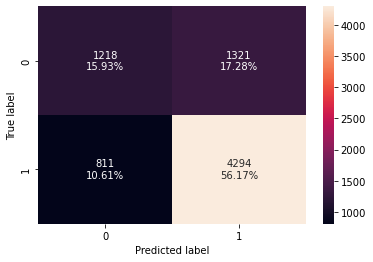

In [149]:
confusion_matrix_sklearn(rdmf_estimator, X_test, y_test)

- The model trains well on the training data. Metrics perform well on the train data.
- F1 score is much better than the one in Bagging and Decision Tree models.
- Data still overfits the model.

##  Will tuning the hyperparameters improve the model performance?

## Bagging Model Improvement

### Decision Tree:  Hyperparameter Tuning

In [70]:
# Tuning Decision tree classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight= 'balanced',random_state=1)

# Grid of parameters to choose from:
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,verbose= 2, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

#### Checking model performance on training set

In [71]:
dtree_estimator_perf_train = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_perf_train

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


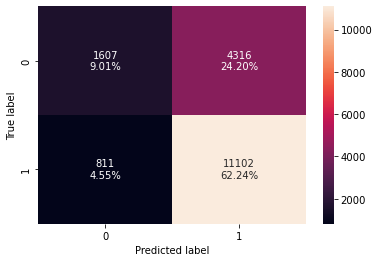

In [72]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

#### Checking model performance on test set

In [73]:
dtree_estimator_perf_test = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_perf_test

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


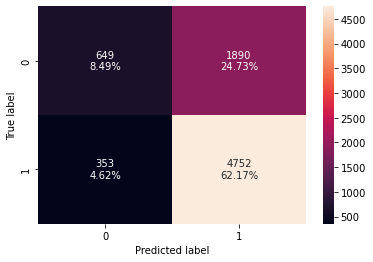

In [74]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

- The tuned decision tree model shows that F1 score has improved. It went from 73% in the test set to 80% in the tuned model. The model generalizes well on the training and test data. 
- Recall has greatly improved as well- 93% compared to the regular decision tree model- 73%.

### Bagging Classifier: Hyperparameter Tuning

In [75]:
# Tuning Bagging classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [70,80,90,100],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=90,
                  random_state=1)

#### Checking model performance on training set

In [76]:
bagging_estimator_tuned_perf_train = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.998542,0.999832,0.997989,0.99891


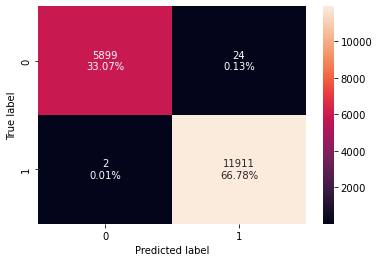

In [77]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

#### Checking model performance on test set

In [78]:
bagging_estimator_tuned_perf_test = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.722527,0.889324,0.744751,0.810642


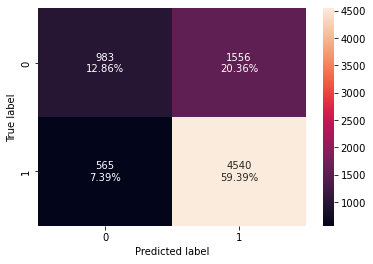

In [79]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

- All the performance metrics have improved compared to the untuned bagging classifier model but precision. 
- F1 score has improved but the model showcases an overfitting on the train data.
- The model does not generalize as well.

### Random Forest: Hyperparameter Tuning

In [80]:
# Tuning Random Forest.
rdmf_estimator_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rdmf_estimator_tuned, parameters,scoring=acc_scorer, cv= 5, n_jobs= -1 )
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
rdmf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rdmf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

In [81]:
rdmf_estimator_tuned_perf_train = model_performance_classification_sklearn(
    rdmf_estimator_tuned, X_train, y_train
)
rdmf_estimator_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.764017,0.922522,0.769823,0.839284


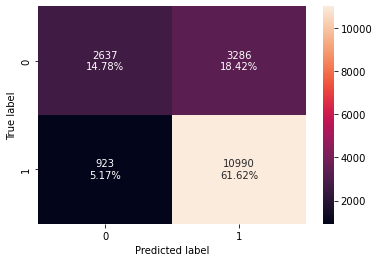

In [85]:
confusion_matrix_sklearn(rdmf_estimator_tuned, X_train, y_train)

#### Checking model performance on test set

In [86]:
rdmf_estimator_tuned_perf_test = model_performance_classification_sklearn(
    rdmf_estimator_tuned, X_test, y_test
)
rdmf_estimator_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.738619,0.906366,0.752725,0.822432


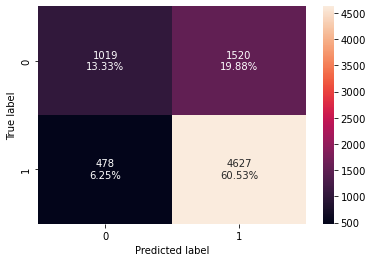

In [87]:
confusion_matrix_sklearn(rdmf_estimator_tuned, X_test, y_test)

- The tuned random forest model generalizes on the test data.
- Performance has increased on all metrics but for decision.
- F1 score on the tuned model has slightly increased to 82% from 80%.

**Observations**:
- Tuning has improved the performance of the Decision Tree and Bagging Classifier models. However, the tuned Random Forest model has not improved much. Despite the lack of improvement, the tuned Random Forest model still provides the highest f1 score among the bagging models.

- Let's examine boosting models.

### Boosting Model Building

### AdaBoost Classifier

In [88]:
# Choosing Adaboost model 
adab_classifier = AdaBoostClassifier(random_state=1)
#Fitting the model
adab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [89]:
adab_classifier_perf_train = model_performance_classification_sklearn(
    adab_classifier, X_train, y_train
)
adab_classifier_perf_train

,Accuracy,Recall,Precision,F1
0,0.738338,0.889113,0.759937,0.819465


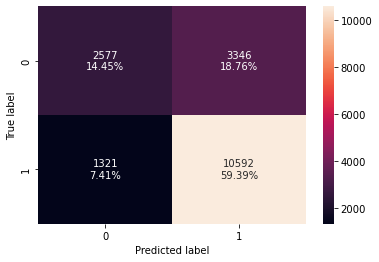

In [90]:
confusion_matrix_sklearn(adab_classifier, X_train, y_train)

#### Checking model performance on test set

In [91]:
adab_classifier_perf_test = model_performance_classification_sklearn(
    adab_classifier, X_test, y_test
)
adab_classifier_perf_test

,Accuracy,Recall,Precision,F1
0,0.732993,0.885211,0.756445,0.815778


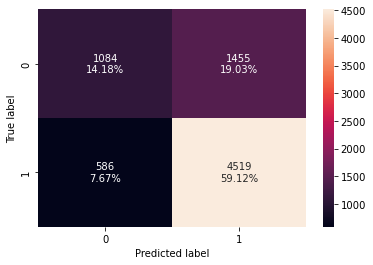

In [92]:
confusion_matrix_sklearn(adab_classifier, X_test, y_test)

- Adaboost classifier model generalizes very well on the test data.
- F1 score is lower than the one in tuned random forest.

### Gradient Boosting Classifier

In [93]:
# Choosing Gradient Boosting model
gradbst_classifier= GradientBoostingClassifier(random_state= 1)
# Fitting the model
gradbst_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

In [94]:
gradbst_classifier_perf_train= model_performance_classification_sklearn(gradbst_classifier, X_train, y_train)
gradbst_classifier_perf_train

,Accuracy,Recall,Precision,F1
0,0.758186,0.881894,0.783328,0.829694


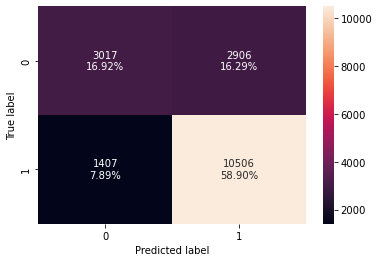

In [95]:
confusion_matrix_sklearn(gradbst_classifier, X_train, y_train)

#### Checking model performance on test set

In [96]:
gradbst_classifier_perf_test= model_performance_classification_sklearn(gradbst_classifier, X_test, y_test)
gradbst_classifier_perf_test

,Accuracy,Recall,Precision,F1
0,0.746337,0.874829,0.77454,0.821636


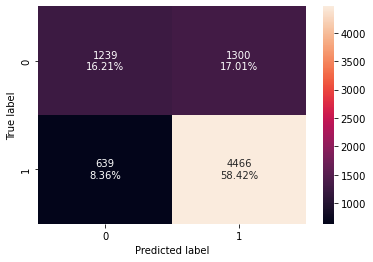

In [97]:
confusion_matrix_sklearn(gradbst_classifier, X_test, y_test)

- Gradient Boosting Classifier generalizes well on the test data.
- F1 score is higher than the one in Adaboost but still lower than the one in tuned random forest
- Let's try another technique: XGBoost

### XGBoost Classifier

In [98]:
# Choosing XGB classifier
xgbst_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
# Fitting the model
xgbst_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

In [99]:
xgbst_classifier_perf_train= model_performance_classification_sklearn(xgbst_classifier, X_train, y_train)
xgbst_classifier_perf_train

,Accuracy,Recall,Precision,F1
0,0.842734,0.934022,0.846417,0.888064


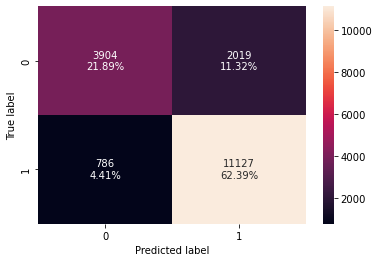

In [100]:
confusion_matrix_sklearn(xgbst_classifier, X_train, y_train)

#### Checking model performance on test set

In [121]:
xgbst_classifier_perf_test= model_performance_classification_sklearn(xgbst_classifier, X_test, y_test)
xgbst_classifier_perf_test

,Accuracy,Recall,Precision,F1
0,0.730377,0.855436,0.767487,0.809078


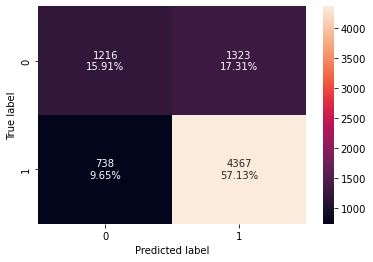

In [102]:
confusion_matrix_sklearn(xgbst_classifier, X_test, y_test)

- Variance can be spotted between the train and test data. This indicates an overfitting of the training data.
- F1 score in testing in lower than the one we previously encountered. For instance, gradient boosting classifier.

## Boosting Model Improvement

### AdaBoost Classifier: Hyperparameter Tuning

In [112]:
# Choosing Tuned Adaboost classifier. 
adab_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(adab_classifier_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
adab_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adab_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

#### Checking model performance on training set

In [113]:
adab_classifier_tuned_perf_train= model_performance_classification_sklearn(adab_classifier_tuned, X_train, y_train)
adab_classifier_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.729199,0.889616,0.750939,0.814416


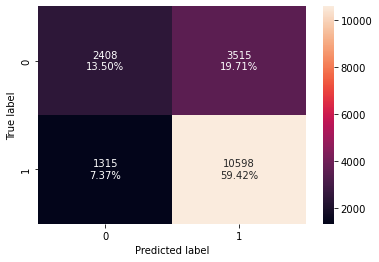

In [114]:
confusion_matrix_sklearn(adab_classifier_tuned, X_train, y_train)

#### Checking model performance on test set

In [115]:
adab_classifier_tuned_perf_test= model_performance_classification_sklearn(adab_classifier_tuned, X_test, y_test)
adab_classifier_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.723705,0.890304,0.745449,0.811462


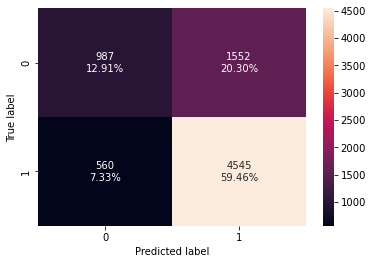

In [119]:
confusion_matrix_sklearn(adab_classifier_tuned, X_test, y_test)

- The model generalizes well on the test data. 
- The tuned adaboost model does not yield much improvement compared to adaboost model.

### Gradient Boosting Classifier: Hyperparameter Tuning

In [120]:
# Choosing Gradient Boost classifier. 
gradbst_classifier_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gradbst_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gradbst_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradbst_classifier_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.9)

#### Checking model performance on training set

In [122]:
gradbst_classifier_tuned_perf_train= model_performance_classification_sklearn(gradbst_classifier_tuned, X_train, y_train)
gradbst_classifier_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.757345,0.881138,0.782832,0.829081


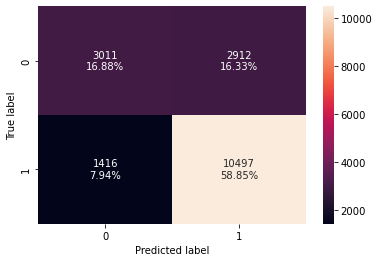

In [125]:
confusion_matrix_sklearn(gradbst_classifier_tuned, X_train, y_train)

#### Checking model performance on test set

In [126]:
gradbst_classifier_tuned_perf_test= model_performance_classification_sklearn(gradbst_classifier_tuned, X_test, y_test)
gradbst_classifier_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.744375,0.874241,0.772814,0.820404


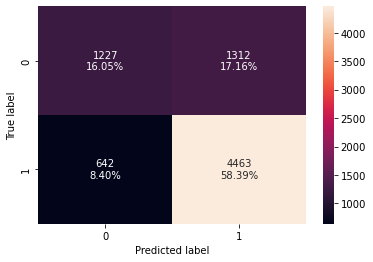

In [127]:
confusion_matrix_sklearn(gradbst_classifier_tuned, X_test, y_test)

- The tuned gradient boosting model generalizes well on the test data.
- The tuned gradient boosting model has not improved much compared to the untuned model.
- F1 score has not improved.

### XGBoost Classifier: Hyperparameter Tuning

In [128]:
# Choosing tuned XGBoost Classifier
xgbst_classifier_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from

parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbst_classifier_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgbst_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbst_classifier_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

In [129]:
xgbst_classifier_tuned_perf_train= model_performance_classification_sklearn(xgbst_classifier_tuned, X_train, y_train)
xgbst_classifier_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.765306,0.882062,0.790729,0.833902


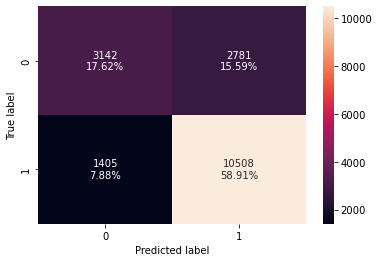

In [130]:
confusion_matrix_sklearn(xgbst_classifier_tuned, X_train, y_train)

#### Checking model performance on test set

In [131]:
xgbst_classifier_tuned_perf_test= model_performance_classification_sklearn(xgbst_classifier_tuned, X_test, y_test)
xgbst_classifier_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.747122,0.87189,0.776789,0.821597


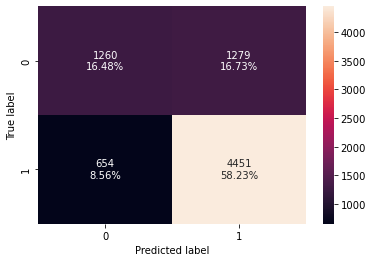

In [132]:
confusion_matrix_sklearn(xgbst_classifier_tuned, X_test, y_test)

- The model generalizes well on the test data.
- Tuned model performance metrics have not significantly improved. 
- F1 score has improved a little and has gone from 80% to 82%.

**Observations**
- The tuned boosting models have not led to a performance improvement.
- Tuned Xgboost has the highest f1 score.

### Stacking Classifier

In [133]:
estimators = [('Random Forest',rdmf_estimator_tuned
), ('Gradient Boosting', gradbst_classifier_tuned), ('Decision Tree',dtree_estimator)]


final_estimator = xgbst_classifier_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class...
                    

#### Checking model performance on training set

In [134]:
stacking_classifier_perf_train = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_perf_train

,Accuracy,Recall,Precision,F1
0,0.761942,0.885503,0.785422,0.832465


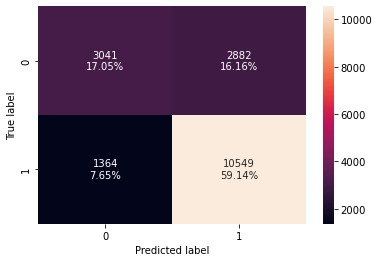

In [135]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

#### Checking model performance on test set

In [136]:
stacking_classifier_perf_test = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_perf_test

,Accuracy,Recall,Precision,F1
0,0.744113,0.873262,0.773019,0.820088


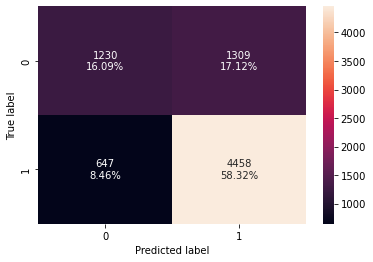

In [137]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

- The stacking classifier generalizes well on the test data.

## Model Performance Comparison and Conclusions

In [139]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_perf_train.T,
        bagging_estimator_perf_train.T,
        bagging_estimator_tuned_perf_train.T,
        rdmf_estimator_perf_train.T,
        rdmf_estimator_tuned_perf_train.T,
        adab_classifier_perf_train.T,
        adab_classifier_tuned_perf_train.T,
        gradbst_classifier_perf_train.T,
        gradbst_classifier_tuned_perf_train.T,
        xgbst_classifier_perf_train.T,
        xgbst_classifier_tuned_perf_train.T,
        stacking_classifier_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.984974,0.998542,0.999944,0.764017,0.738338,0.729199,0.758186,0.757345,0.730377,0.765306,0.761942
Recall,1.0,0.931923,0.985394,0.999832,0.999916,0.922522,0.889113,0.889616,0.881894,0.881138,0.855436,0.882062,0.885503
Precision,1.0,0.720067,0.992056,0.997989,1.000000,0.769823,0.759937,0.750939,0.783328,0.782832,0.767487,0.790729,0.785422
F1,1.0,0.812411,0.988714,0.998910,0.999958,0.839284,0.819465,0.814416,0.829694,0.829081,0.809078,0.833902,0.832465


In [143]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_perf_test.T,
        bagging_estimator_perf_test.T,
        bagging_estimator_tuned_perf_test.T,
        rdmf_estimator_perf_test.T,
        rdmf_estimator_tuned_perf_test.T,
        adab_classifier_perf_test.T,
        adab_classifier_tuned_perf_test.T,
        gradbst_classifier_perf_test.T,
        gradbst_classifier_tuned_perf_test.T,
        xgbst_classifier_perf_test.T,
        xgbst_classifier_tuned_perf_test.T,
        stacking_classifier_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652276,0.706567,0.698325,0.722527,0.721088,0.738619,0.732993,0.723705,0.746337,0.744375,0.730377,0.747122,0.744113
Recall,0.732027,0.930852,0.773947,0.889324,0.841136,0.906366,0.885211,0.890304,0.874829,0.874241,0.855436,0.871890,0.873262
Precision,0.743386,0.715447,0.774250,0.744751,0.764737,0.752725,0.756445,0.745449,0.774540,0.772814,0.767487,0.776789,0.773019
F1,0.737663,0.809058,0.774099,0.810642,0.801119,0.822432,0.815778,0.811462,0.821636,0.820404,0.809078,0.821597,0.820088


- The majority of the models yields a generalized performance. 
- The Tuned Random Forest displays the highest f1 score on the test data. It showcases the highest recall among the models with highest f1 score as well.

### Feature importance of Tuned Random Forest

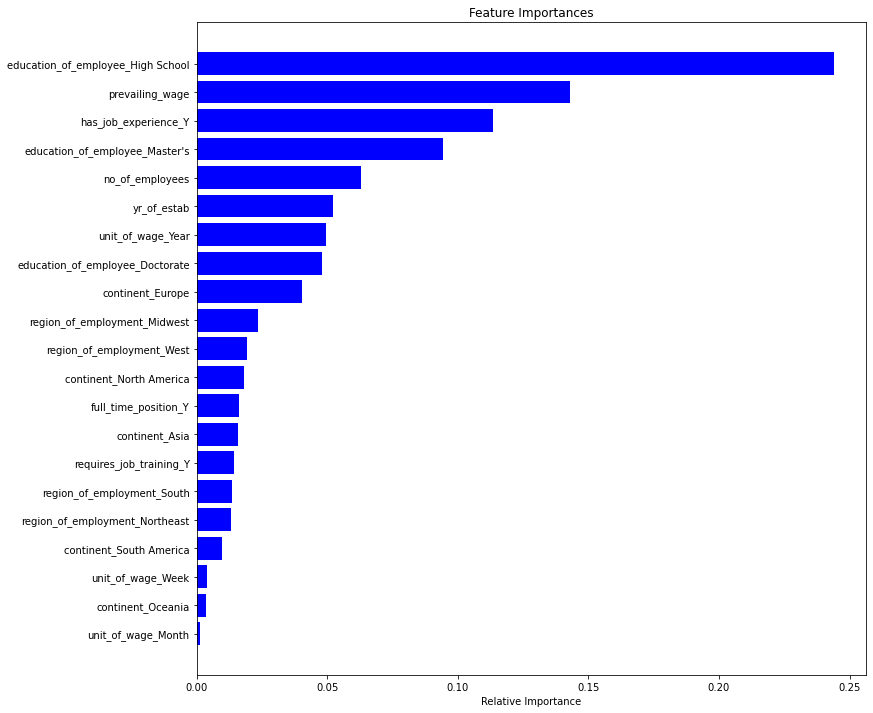

In [145]:
feature_names = X_train.columns
importances = rdmf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- High school education, prevailing wage and job experience are the highest predictors for a visa certification.

## Actionable Insights and Recommendations

- Our analysis leads to conclude that the following features or predictors are of most importance for visa certification:
   -  High school education level is important. The US needs to fill in some blue-collar jobs, especially in auto industry, manufacturing, and meat processing where higher education is not needed. In fact, the first region of employment that  welcomes visa applicants is the Midwest where most of those companies reside.
   - Prevailing wage comes as the second most important feature. Monetary rewards entice workers to migrate to the US where wages are much higher from their respective countries of origin.
   - Job experience is also an important feature. A minimum of experience is required to increase chances of being awarded a visa in the U.S.
   - Master's education level is the fourth very most important feature. In fact, high-tech workers are encouraged to apply for visa in the U.S. Most of them go on to work in the Silicon Valley or High tech companies such as Google, Microsof, Amazon, etc.
   - The number of employees is the fifth most important feature according to the model. Most of these companies employ thousands of workers and are labor intense.
   
Though Adaboost classifier presents a very well generalized model with a decent f1 score- 81.14%  but lower than the ones for Gradient boosting and XG boosting, we recommend the Tuned random forest  as a suitable model to predict a profile for the applicants  for whom the visa should be certified or denied.
The Tuned Random Forest generalizes well and produces the highest f1 score as well as the best recall.